In [1]:
from main import *
from hyperparameter import *
from transferlearning import *

# Preprocessing, Visualization, and Train/Val/Test Split

In [2]:
data_dir ='data' # Change to the path to your directory
train_images_dir = os.path.join(data_dir, 'Training')
test_images_dir = os.path.join(data_dir, 'Testing')
print(f"Data directory: {data_dir}")
print(f"Training directory: {train_images_dir}")
print(f"Testing directory: {test_images_dir}")

Data directory: data
Training directory: data/Training
Testing directory: data/Testing


In [3]:
# Load the training and test data
try:
    train_data, test_data = get_images(train_images_dir, test_images_dir)
    print("Data loading completed successfully.")
    print(f"Number of training samples: {train_data.samples}")
    print(f"Number of test samples: {test_data.samples}")
    print(f"Class names: {train_data.class_indices}")
except Exception as e:
    print(f"Error loading data: {e}")
    raise

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Data loading completed successfully.
Number of training samples: 5712
Number of test samples: 1311
Class names: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


In [4]:
class_names_train = list(train_data.class_indices.keys())
class_names_test = list(test_data.class_indices.keys())
print(class_names_train)

['glioma', 'meningioma', 'notumor', 'pituitary']


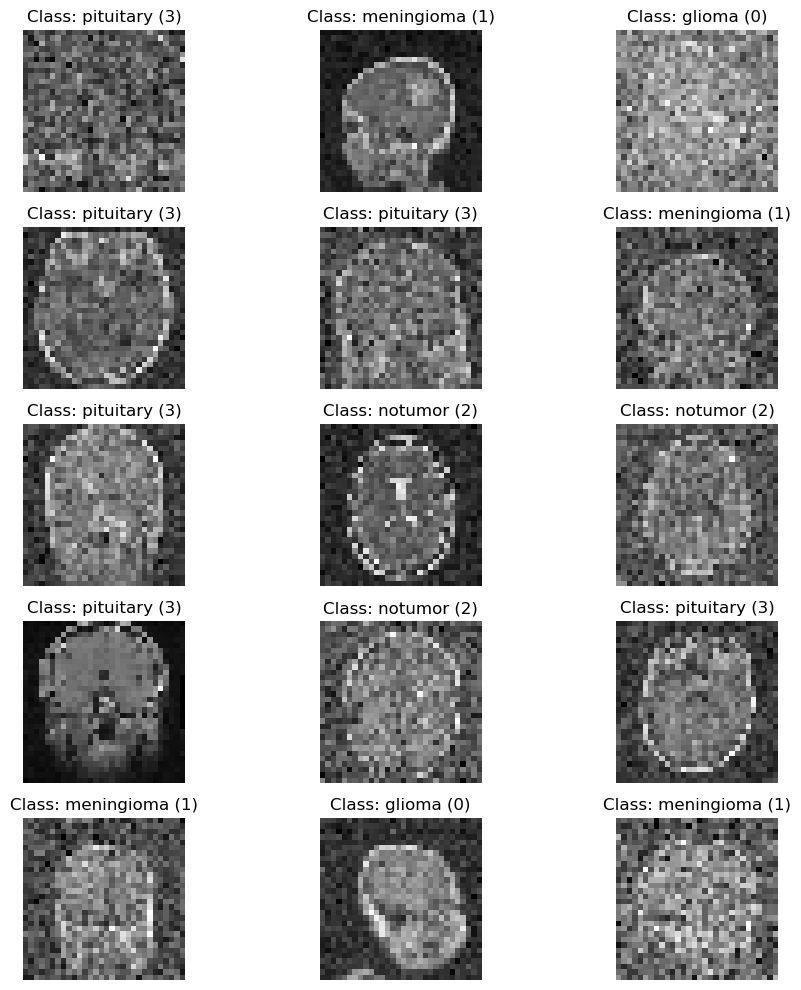

In [5]:
visualize_batch(train_data)

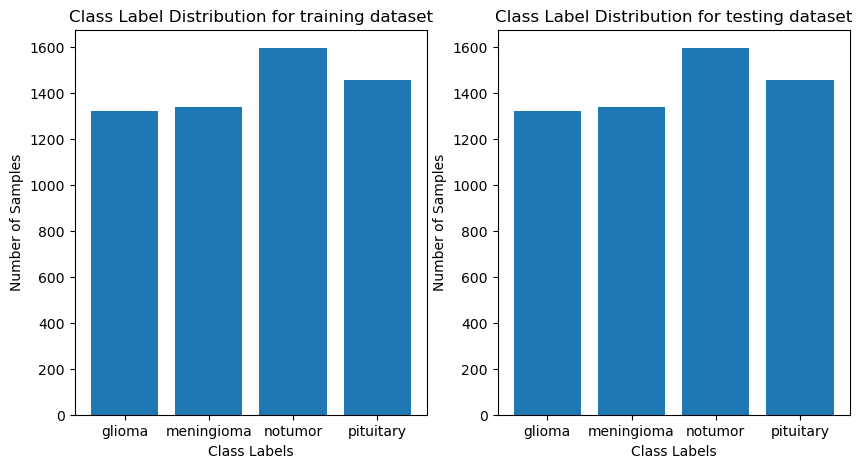

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
plot_class_dist(ax1, train_data, "training")
plot_class_dist(ax2, train_data, "testing")

In [7]:
X_train, y_train, X_val, y_val = train_val_split(train_data)
X_test, y_test = test_splits(test_data)

Number of batches in the training data: 179
Batch size of a single batch 32
Number of samples in the training dataset 5712

Number of training data batches with val split of 0.2: 144
Number of validation data batches: 35

Shape of image training set: (4608, 30, 30, 1)
Shape of image validation set: (1104, 30, 30, 1)

Shape of label training set: (4608, 4)
Shape of label validation set: (1104, 4)
Number of batches in the test data: 41
Batch size of a single batch 32
Number of samples in the test dataset 1311

Shape of image test set: (1311, 30, 30, 1)

Shape of label test set: (1311, 4)


# Baseline Model

In [8]:
base = baseline()
history = base.fit(X_train, y_train, batch_size =32, epochs = 10, validation_data = (X_val, y_val))

Epoch 1/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - F1Score: 0.4160 - accuracy: 0.4614 - loss: 1.1918 - precision: 0.6284 - recall: 0.1516 - val_F1Score: 0.7001 - val_accuracy: 0.7020 - val_loss: 0.8050 - val_precision: 0.7909 - val_recall: 0.5688
Epoch 2/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - F1Score: 0.7102 - accuracy: 0.7213 - loss: 0.7460 - precision: 0.7899 - recall: 0.6221 - val_F1Score: 0.7257 - val_accuracy: 0.7319 - val_loss: 0.6813 - val_precision: 0.7947 - val_recall: 0.6522
Epoch 3/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - F1Score: 0.7566 - accuracy: 0.7665 - loss: 0.6164 - precision: 0.8144 - recall: 0.7076 - val_F1Score: 0.7440 - val_accuracy: 0.7563 - val_loss: 0.6194 - val_precision: 0.7963 - val_recall: 0.7083
Epoch 4/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - F1Score: 0.7984 - accuracy: 0.8075 - loss: 0.5437 - precision: 0.8445 - recall: 0.7615 - val_F1Score: 0.7563 - val_accuracy: 0.7645 - val_loss: 0.5966 - val_precision: 0.7941 - val_recall: 0.71

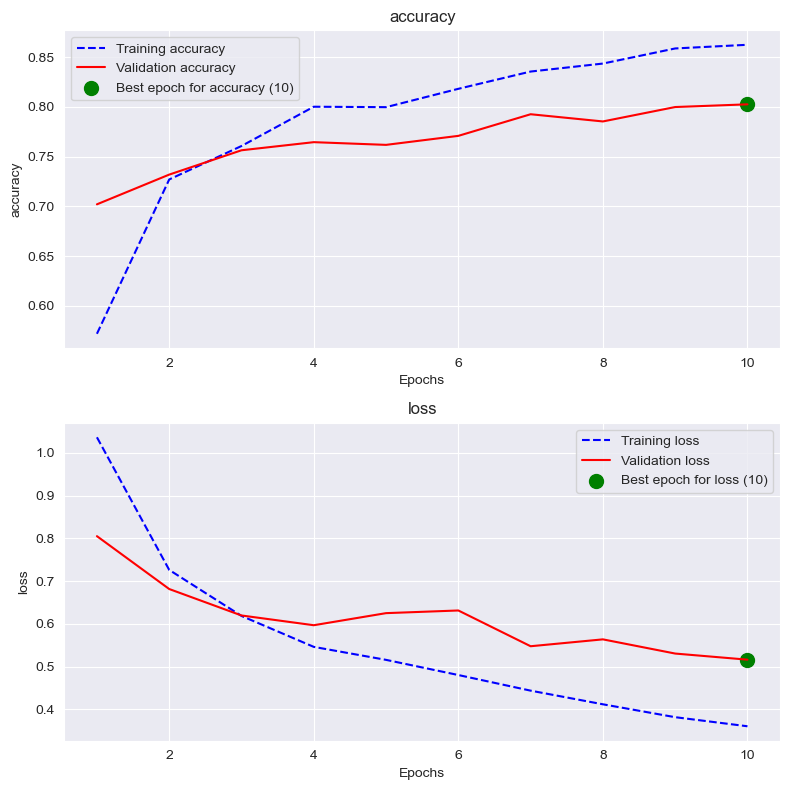

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


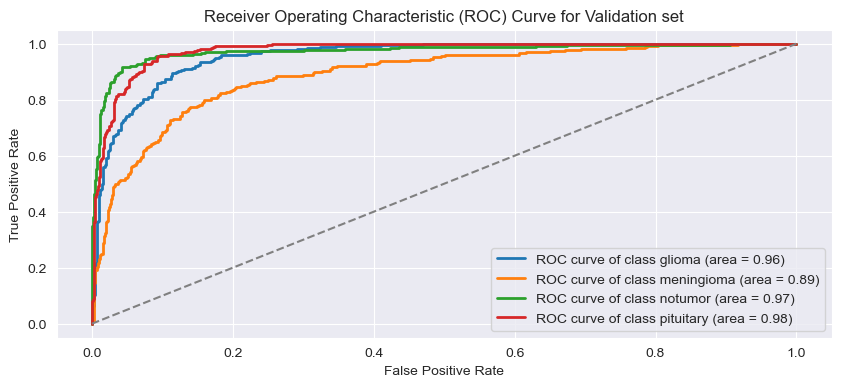

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


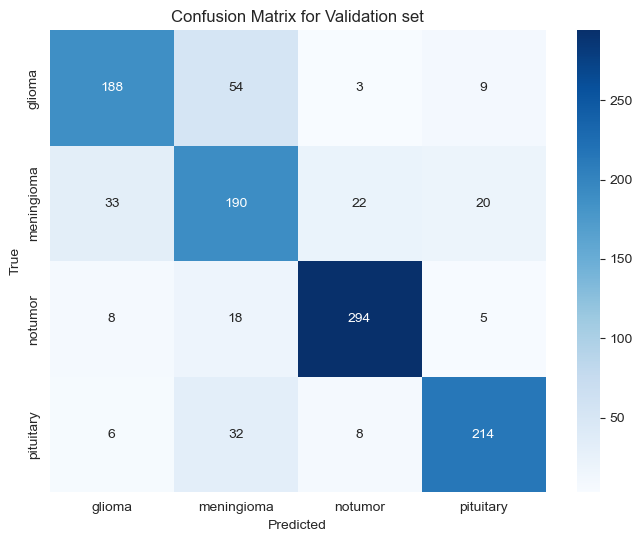

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


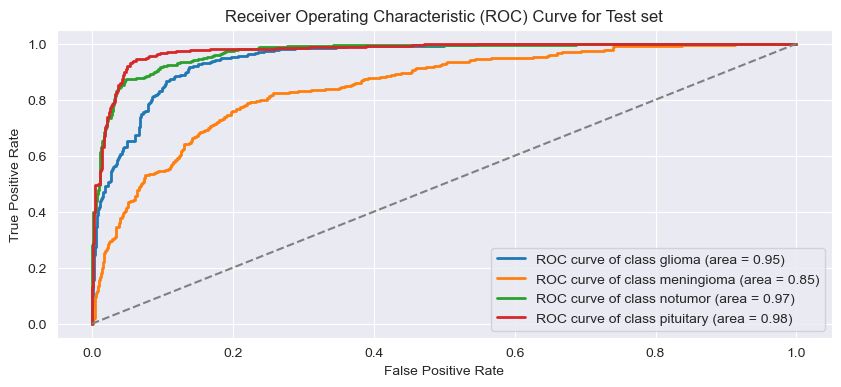

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


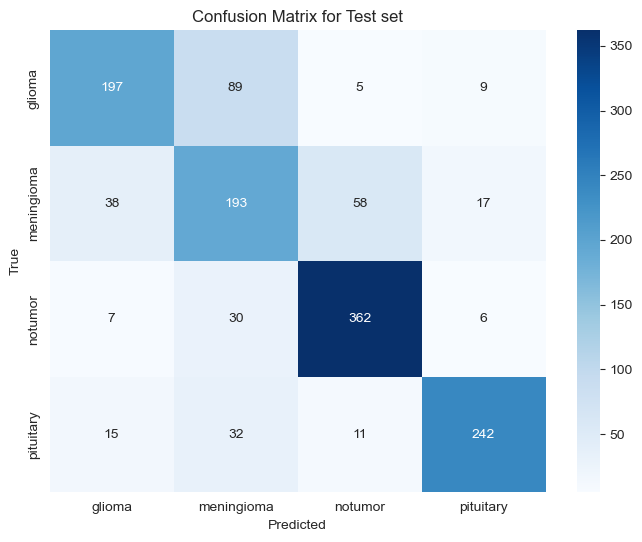

In [9]:
summarize_metric(history)

plot_roc_curve(base, X_val, y_val, class_names_train, title = 'Validation set')
plot_confusion_matrix(base, X_val, y_val, class_names_train, normalize=False, title = 'Validation set')

plot_roc_curve(base, X_test, y_test, class_names_test, title = 'Test set')
plot_confusion_matrix(base, X_test, y_test, class_names_test, normalize=False, title = 'Test set')

In [10]:
models = [base]

metrics, f1 = get_metrics(models, X_test, y_test, class_names_test)
display(metrics.rename(columns = {0: "Baselinemodel"}))
display(f1.rename(columns = {0: "F1"}))

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - F1Score: 0.4610 - accuracy: 0.6988 - loss: 0.6670 - precision: 0.7130 - recall: 0.6716


,Baselinemodel
accuracy,0.758200
precision,0.781123
recall,0.732265


,F1
glioma,0.707361
meningioma,0.593846
notumor,0.860880
pituitary,0.843206


# Transfer learning

## VGG16

Epoch 1/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 27s 183ms/step - F1Score: 0.4534 - accuracy: 0.4779 - loss: 1.1699 - precision: 0.7021 - recall: 0.1650 - val_F1Score: 0.5929 - val_accuracy: 0.6313 - val_loss: 0.9068 - val_precision: 0.7330 - val_recall: 0.4973
Epoch 2/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 25s 172ms/step - F1Score: 0.6271 - accuracy: 0.6424 - loss: 0.8501 - precision: 0.7662 - recall: 0.4885 - val_F1Score: 0.6718 - val_accuracy: 0.6857 - val_loss: 0.8039 - val_precision: 0.7866 - val_recall: 0.5208
Epoch 3/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 24s 169ms/step - F1Score: 0.6771 - accuracy: 0.6907 - loss: 0.7840 - precision: 0.7780 - recall: 0.5429 - val_F1Score: 0.6716 - val_accuracy: 0.6884 - val_loss: 0.7774 - val_precision: 0.7825 - val_recall: 0.5507
Epoch 4/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 24s 166ms/step - F1Score: 0.6679 - accuracy: 0.6773 - loss: 0.7673 - precision: 0.7682 - recall: 0.5616 - val_F1Score: 0.6504 - val_accuracy: 0.6793 - val_loss: 0.7667 - val_precision: 0.7612 - val_rec

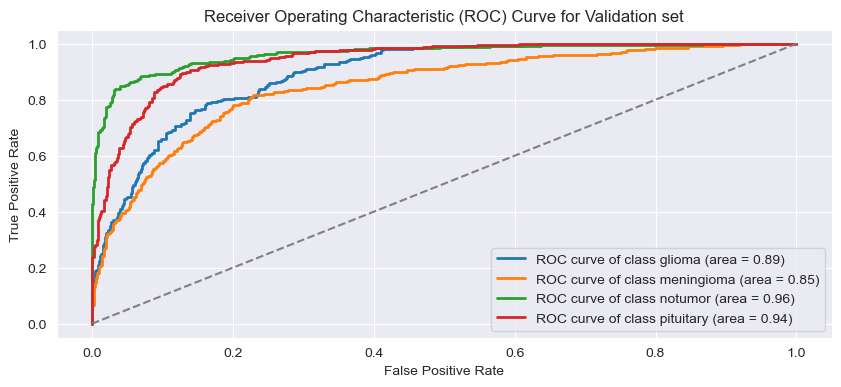

35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step


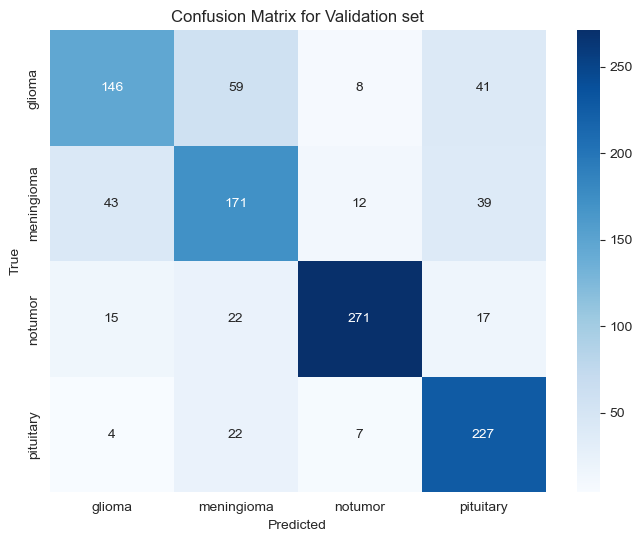

In [11]:
from tensorflow.keras.applications.vgg16 import VGG16

resolution=32

vgg16_model = transfer_learning(VGG16, resolution,X_train, y_train, X_val, y_val, epochs=30, batch_size=32, optimizer = "adam")

plot_roc_curve(vgg16_model, X_val, y_val, class_names_train, title = 'Validation set')
plot_confusion_matrix(vgg16_model, X_val, y_val, class_names_train, normalize=False, title = 'Validation set')


## VGG16 with two dense layers

Epoch 1/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 24s 158ms/step - F1Score: 0.3803 - accuracy: 0.4045 - loss: 1.2551 - precision: 0.6379 - recall: 0.1192 - val_F1Score: 0.5806 - val_accuracy: 0.6196 - val_loss: 0.9124 - val_precision: 0.7537 - val_recall: 0.4103
Epoch 2/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - F1Score: 0.5914 - accuracy: 0.6101 - loss: 0.9226 - precision: 0.7325 - recall: 0.4303 - val_F1Score: 0.6496 - val_accuracy: 0.6513 - val_loss: 0.8545 - val_precision: 0.7493 - val_recall: 0.5172
Epoch 3/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - F1Score: 0.6231 - accuracy: 0.6378 - loss: 0.8495 - precision: 0.7524 - recall: 0.5142 - val_F1Score: 0.6719 - val_accuracy: 0.6884 - val_loss: 0.7845 - val_precision: 0.8075 - val_recall: 0.5245
Epoch 4/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - F1Score: 0.6620 - accuracy: 0.6777 - loss: 0.7988 - precision: 0.7613 - recall: 0.5529 - val_F1Score: 0.6833 - val_accuracy: 0.6902 - val_loss: 0.7596 - val_precision: 0.7764 - val_recall

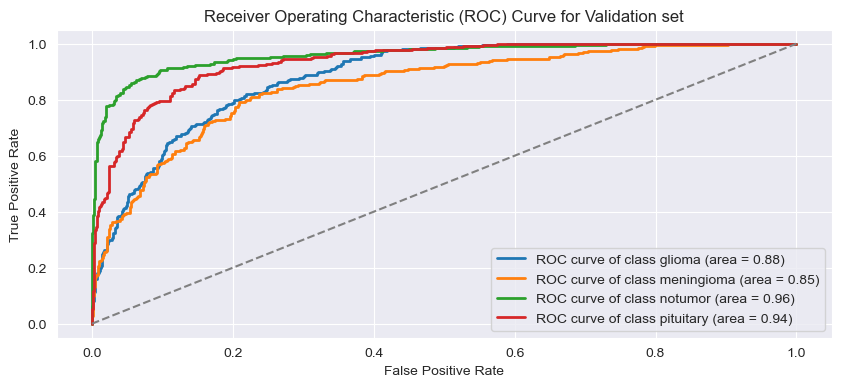

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step


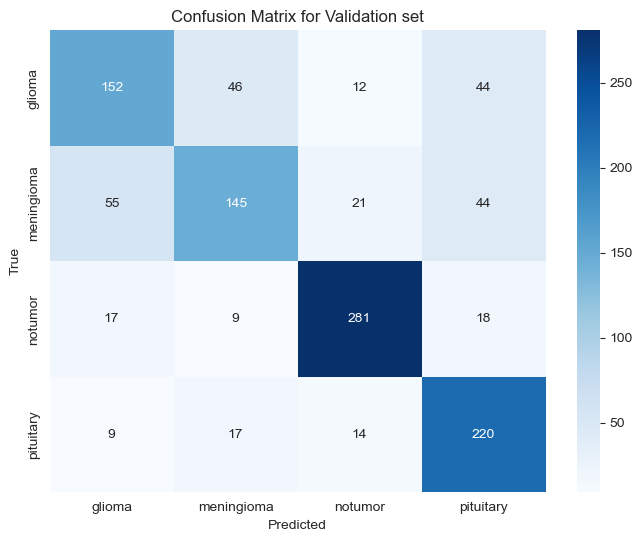

In [13]:

resolution=32

vgg16_model1 = transfer_learning(VGG16, resolution,X_train, y_train, X_val, y_val, epochs=30, batch_size=32, optimizer = "adam", add_extra_layer=True)

plot_roc_curve(vgg16_model1, X_val, y_val, class_names_train, title = 'Validation set')
plot_confusion_matrix(vgg16_model1, X_val, y_val, class_names_train, normalize=False, title = 'Validation set')


## Resnet50

Epoch 1/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - F1Score: 0.3442 - accuracy: 0.3594 - loss: 1.3859 - precision: 0.4484 - recall: 0.1258 - val_F1Score: 0.5210 - val_accuracy: 0.5272 - val_loss: 1.1312 - val_precision: 0.8371 - val_recall: 0.1676
Epoch 2/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - F1Score: 0.4360 - accuracy: 0.4462 - loss: 1.2032 - precision: 0.5597 - recall: 0.2479 - val_F1Score: 0.5179 - val_accuracy: 0.5154 - val_loss: 1.1102 - val_precision: 0.7139 - val_recall: 0.2464
Epoch 3/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - F1Score: 0.5301 - accuracy: 0.5438 - loss: 1.0734 - precision: 0.6900 - recall: 0.2890 - val_F1Score: 0.5476 - val_accuracy: 0.5743 - val_loss: 1.0259 - val_precision: 0.7375 - val_recall: 0.3207
Epoch 4/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - F1Score: 0.4979 - accuracy: 0.5105 - loss: 1.0940 - precision: 0.6294 - recall: 0.3318 - val_F1Score: 0.4053 - val_accuracy: 0.4900 - val_loss: 1.1946 - val_precision: 0.6844 - val_recall: 0.

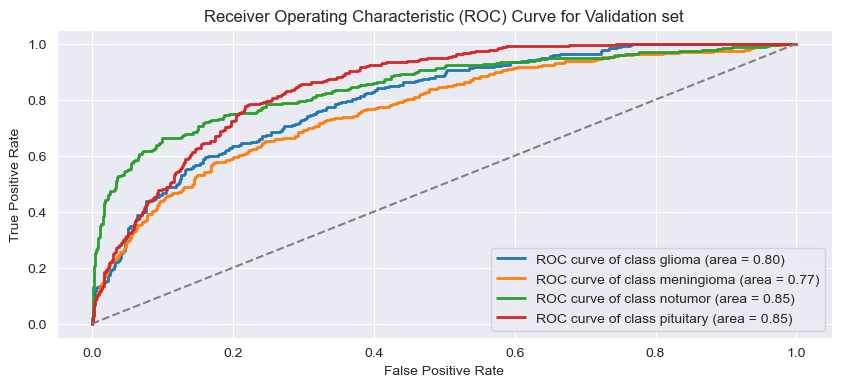

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


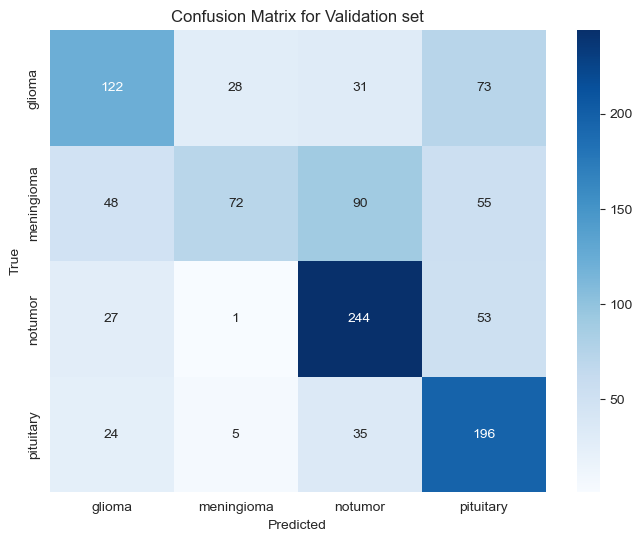

In [14]:
from tensorflow.keras.applications import ResNet50

resolution=32

resnet_model = transfer_learning(ResNet50, resolution,X_train, y_train, X_val, y_val, epochs=30, batch_size=32, optimizer = "adam")

plot_roc_curve(resnet_model, X_val, y_val, class_names_train, title = 'Validation set')
plot_confusion_matrix(resnet_model, X_val, y_val, class_names_train, normalize=False, title = 'Validation set')


## Resnet50 with two dense layers

Epoch 1/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - F1Score: 0.2696 - accuracy: 0.2742 - loss: 1.5398 - precision: 0.2863 - recall: 0.0521 - val_F1Score: 0.4336 - val_accuracy: 0.4447 - val_loss: 1.2955 - val_precision: 0.8636 - val_recall: 0.0172
Epoch 2/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - F1Score: 0.3422 - accuracy: 0.3678 - loss: 1.2941 - precision: 0.6753 - recall: 0.0617 - val_F1Score: 0.3088 - val_accuracy: 0.3976 - val_loss: 1.2109 - val_precision: 0.6741 - val_recall: 0.1368
Epoch 3/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - F1Score: 0.3695 - accuracy: 0.4025 - loss: 1.2615 - precision: 0.6489 - recall: 0.0911 - val_F1Score: 0.4614 - val_accuracy: 0.4946 - val_loss: 1.1664 - val_precision: 0.8047 - val_recall: 0.1232
Epoch 4/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - F1Score: 0.3989 - accuracy: 0.4339 - loss: 1.2153 - precision: 0.6705 - recall: 0.1321 - val_F1Score: 0.3638 - val_accuracy: 0.4194 - val_loss: 1.1928 - val_precision: 0.7919 - val_recall: 0.

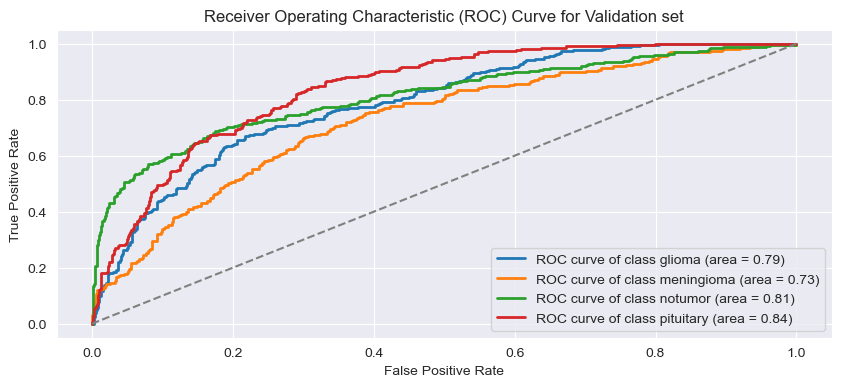

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


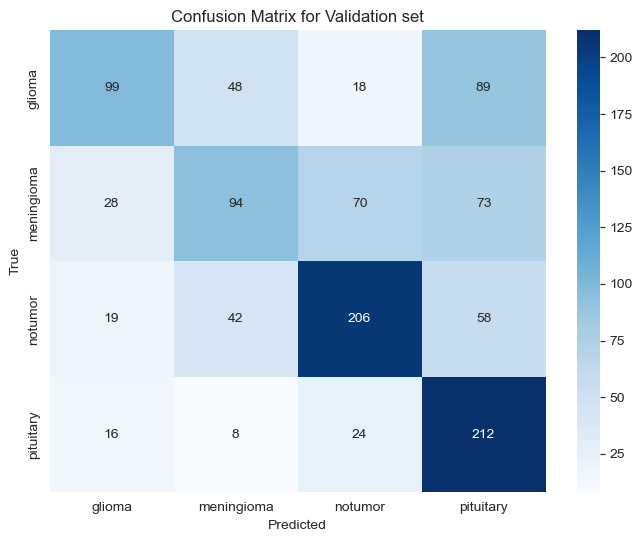

In [17]:
resolution=32

resnet_model1 = transfer_learning(ResNet50, resolution,X_train, y_train, X_val, y_val, epochs=30, batch_size=32, optimizer = "adam", add_extra_layer=True)

plot_roc_curve(resnet_model1, X_val, y_val, class_names_train, title = 'Validation set')
plot_confusion_matrix(resnet_model1, X_val, y_val, class_names_train, normalize=False, title = 'Validation set')


## Densenet121

Epoch 1/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - F1Score: 0.5064 - accuracy: 0.5194 - loss: 1.0873 - precision: 0.6352 - recall: 0.3684 - val_F1Score: 0.6048 - val_accuracy: 0.6386 - val_loss: 0.8335 - val_precision: 0.7283 - val_recall: 0.5317
Epoch 2/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - F1Score: 0.6768 - accuracy: 0.6905 - loss: 0.7520 - precision: 0.7738 - recall: 0.5779 - val_F1Score: 0.6153 - val_accuracy: 0.6223 - val_loss: 0.8424 - val_precision: 0.6817 - val_recall: 0.5471
Epoch 3/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - F1Score: 0.7017 - accuracy: 0.7104 - loss: 0.7034 - precision: 0.7785 - recall: 0.6312 - val_F1Score: 0.6634 - val_accuracy: 0.6685 - val_loss: 0.7797 - val_precision: 0.7183 - val_recall: 0.6051
Epoch 4/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - F1Score: 0.7450 - accuracy: 0.7515 - loss: 0.6225 - precision: 0.8080 - recall: 0.6714 - val_F1Score: 0.6408 - val_accuracy: 0.6585 - val_loss: 0.7698 - val_precision: 0.7155 - val_recall: 0.

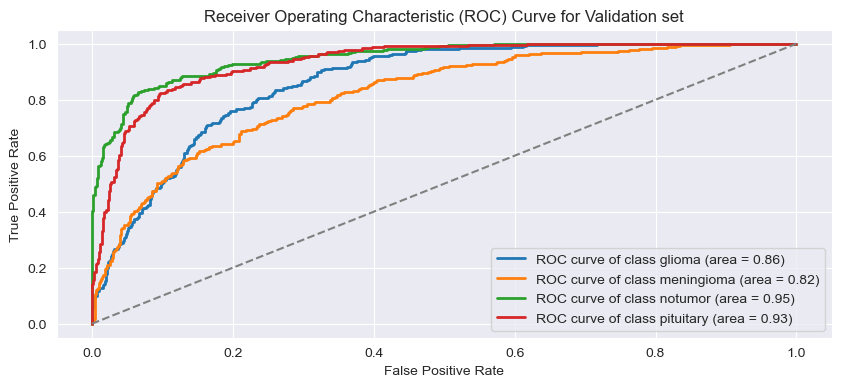

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


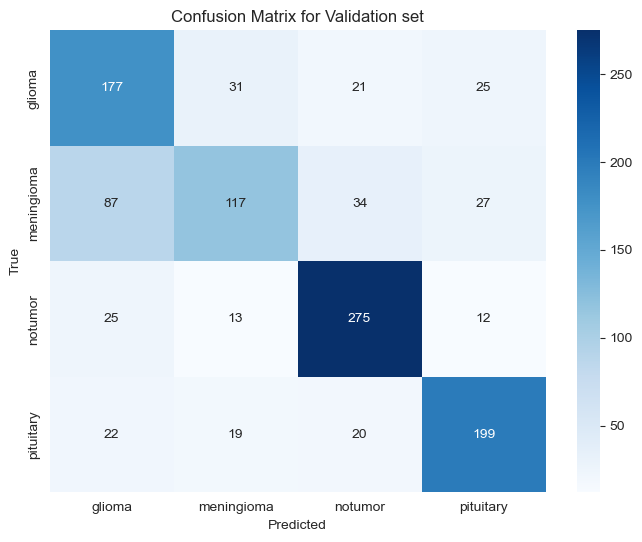

In [18]:
from tensorflow.keras.applications import DenseNet121

resolution=32

densenet_model = transfer_learning(DenseNet121, resolution,X_train, y_train, X_val, y_val, epochs=30, batch_size=32, optimizer = "adam")

plot_roc_curve(densenet_model, X_val, y_val, class_names_train, title = 'Validation set')
plot_confusion_matrix(densenet_model, X_val, y_val, class_names_train, normalize=False, title = 'Validation set')


## Densenet121 with two dense layers

Epoch 1/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - F1Score: 0.4438 - accuracy: 0.4561 - loss: 1.2399 - precision: 0.5580 - recall: 0.2513 - val_F1Score: 0.6016 - val_accuracy: 0.6150 - val_loss: 0.8795 - val_precision: 0.7459 - val_recall: 0.4149
Epoch 2/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - F1Score: 0.6053 - accuracy: 0.6210 - loss: 0.8792 - precision: 0.7227 - recall: 0.4701 - val_F1Score: 0.6268 - val_accuracy: 0.6476 - val_loss: 0.8384 - val_precision: 0.7350 - val_recall: 0.5226
Epoch 3/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - F1Score: 0.6584 - accuracy: 0.6730 - loss: 0.7972 - precision: 0.7601 - recall: 0.5507 - val_F1Score: 0.6484 - val_accuracy: 0.6658 - val_loss: 0.7883 - val_precision: 0.7564 - val_recall: 0.5598
Epoch 4/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - F1Score: 0.6635 - accuracy: 0.6815 - loss: 0.7472 - precision: 0.7544 - recall: 0.5771 - val_F1Score: 0.6195 - val_accuracy: 0.6549 - val_loss: 0.8002 - val_precision: 0.7256 - val_recall: 0.

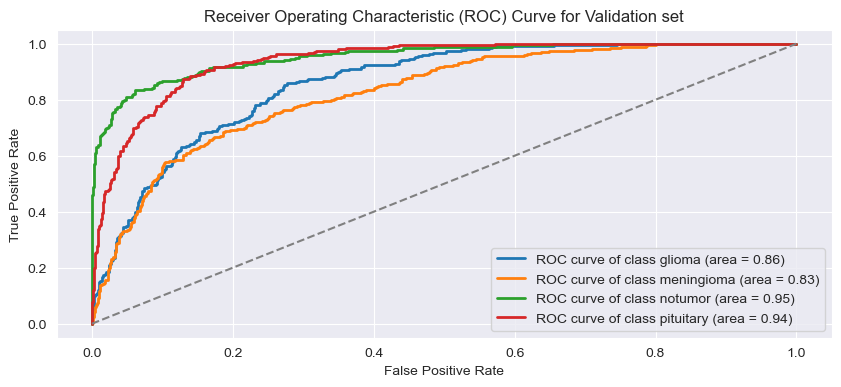

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


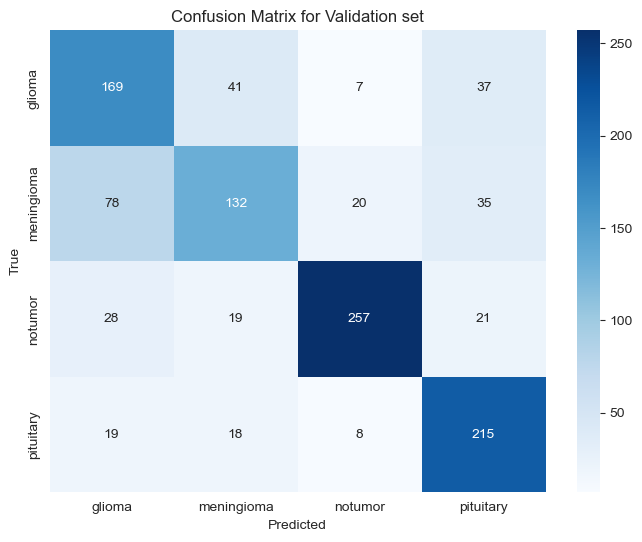

In [19]:
resolution=32

densenet_model1 = transfer_learning(DenseNet121, resolution,X_train, y_train, X_val, y_val, epochs=30, batch_size=32, optimizer = "adam", add_extra_layer=True)

plot_roc_curve(densenet_model1, X_val, y_val, class_names_train, title = 'Validation set')
plot_confusion_matrix(densenet_model1, X_val, y_val, class_names_train, normalize=False, title = 'Validation set')


## EfficientNet

Epoch 1/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - F1Score: 0.2285 - accuracy: 0.2706 - loss: 1.4283 - precision: 0.3368 - recall: 0.0108 - val_F1Score: 0.0968 - val_accuracy: 0.2400 - val_loss: 1.3894 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - F1Score: 0.2244 - accuracy: 0.2578 - loss: 1.3939 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_F1Score: 0.1137 - val_accuracy: 0.2944 - val_loss: 1.3821 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - F1Score: 0.2025 - accuracy: 0.2679 - loss: 1.3875 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_F1Score: 0.1137 - val_accuracy: 0.2944 - val_loss: 1.3828 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - F1Score: 0.1897 - accuracy: 0.2516 - loss: 1.3902 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_F1Score: 0.1137 - val_accuracy: 0.2944 - val_loss: 

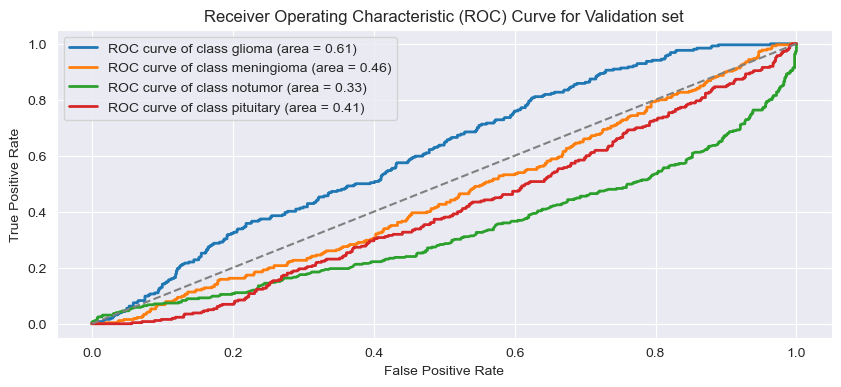

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


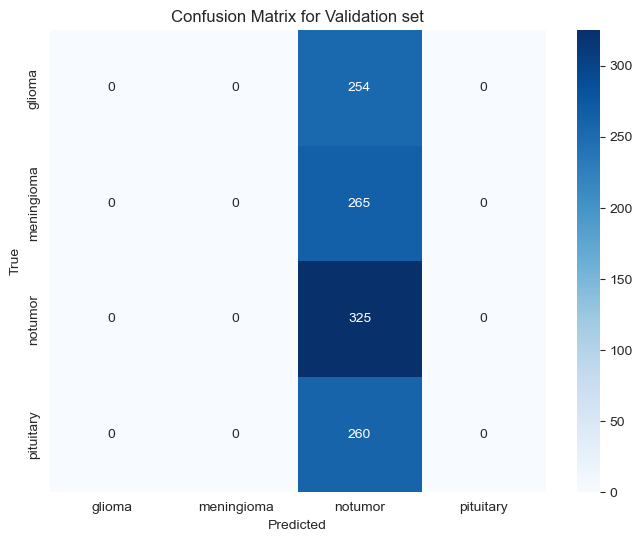

In [20]:
from tensorflow.keras.applications import EfficientNetB0

resolution=32

efficientnet_model = transfer_learning(EfficientNetB0, resolution,X_train, y_train, X_val, y_val, epochs=30, batch_size=32, optimizer = "adam")

plot_roc_curve(efficientnet_model, X_val, y_val, class_names_train, title = 'Validation set')
plot_confusion_matrix(efficientnet_model, X_val, y_val, class_names_train, normalize=False, title = 'Validation set')


## EfficientNet80B with 2 dense layers

Epoch 1/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - F1Score: 0.2207 - accuracy: 0.2402 - loss: 1.4135 - precision: 0.5545 - recall: 0.0016 - val_F1Score: 0.0953 - val_accuracy: 0.2355 - val_loss: 1.3857 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - F1Score: 0.2032 - accuracy: 0.2610 - loss: 1.3857 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_F1Score: 0.1137 - val_accuracy: 0.2944 - val_loss: 1.3835 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - F1Score: 0.1244 - accuracy: 0.2624 - loss: 1.3858 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_F1Score: 0.1137 - val_accuracy: 0.2944 - val_loss: 1.3828 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - F1Score: 0.1258 - accuracy: 0.2733 - loss: 1.3848 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_F1Score: 0.1137 - val_accuracy: 0.2944 - val_loss: 

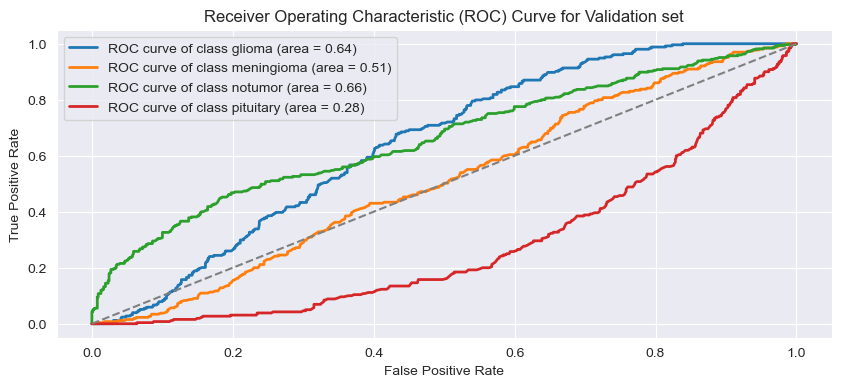

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


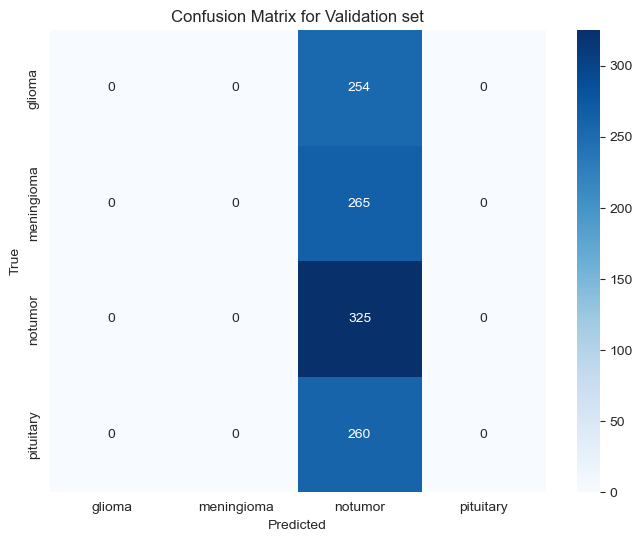

In [21]:
resolution=32

efficientnet_model1 = transfer_learning(EfficientNetB0, resolution,X_train, y_train, X_val, y_val, epochs=30, batch_size=32, optimizer = "adam", add_extra_layer=True)

plot_roc_curve(efficientnet_model1, X_val, y_val, class_names_train, title = 'Validation set')
plot_confusion_matrix(efficientnet_model1, X_val, y_val, class_names_train, normalize=False, title = 'Validation set')


## Transfer learning results (without any finetuning)

In [22]:
models = [vgg16_model, resnet_model, densenet_model, efficientnet_model, vgg16_model1, resnet_model1, densenet_model1, efficientnet_model1]

metrics, f1 = get_metrics(models, X_val, y_val, class_names_train)
display(metrics.rename(columns = {0: "VGG16", 1: "Resnet50", 2: "Densenet121", 3: "EfficientNetB0", 4: "VGG16 (2 layers)", 5: "Resnet50 (2 layers)", 6: "Densenet121 (2 layers)", 7: "EfficientNetB0 (2 layers)"}))
display(f1.rename(columns =  {0: "VGG16", 1: "Resnet50", 2: "Densenet121", 3: "EfficientNetB0", 4: "VGG16 (2 layers)", 5: "Resnet50 (2 layers)", 6: "Densenet121 (2 layers)", 7: "EfficientNetB0 (2 layers)"}))

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - F1Score: 0.7191 - accuracy: 0.7317 - loss: 0.7147 - precision: 0.7751 - recall: 0.6451
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - F1Score: 0.5409 - accuracy: 0.5690 - loss: 1.0319 - precision: 0.7391 - recall: 0.3121
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - F1Score: 0.6682 - accuracy: 0.6823 - loss: 0.8203 - precision: 0.7226 - recall: 0.6373
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - F1Score: 0.1131 - accuracy: 0.2925 - loss: 1.3837 - precision: 0.0000e+00 - recall: 0.0000e+00
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - F1Score: 0.7003 - accuracy: 0.7162 - loss: 0.7229 - precision: 0.7797 - recall: 0.6208
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - F1Score: 0.5328 - accuracy: 0.5560 - loss: 1.0933 - precision: 0.7838 - recall: 0.1857
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - F1Score: 0.6900 - accuracy: 0.6997 - loss: 0.7993 - precision: 0.7268 - recall: 0.6238
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - F1Score: 0.1131 - accuracy: 0.2925 - loss: 1.38

,VGG16,Resnet50,Densenet121,EfficientNetB0,VGG16 (2 layers),Resnet50 (2 layers),Densenet121 (2 layers),EfficientNetB0 (2 layers)
accuracy,0.738225,0.574275,0.695652,0.294384,0.722826,0.553442,0.700181,0.294384
precision,0.781284,0.737500,0.736241,0.000000,0.783845,0.800781,0.734457,0.000000
recall,0.650362,0.320652,0.642210,0.000000,0.624094,0.185688,0.631341,0.000000


,VGG16,Resnet50,Densenet121,EfficientNetB0,VGG16 (2 layers),Resnet50 (2 layers),Densenet121 (2 layers),EfficientNetB0 (2 layers)
glioma,0.632035,0.513684,0.626549,0.000000,0.624230,0.475961,0.616788,0.000000
meningioma,0.634508,0.388140,0.525843,0.000000,0.601660,0.411379,0.555789,0.000000
notumor,0.869984,0.673103,0.814815,0.454864,0.860643,0.640746,0.833063,0.454864
pituitary,0.777397,0.615385,0.760994,0.000000,0.750853,0.612717,0.757042,0.000000
